In [1]:
%matplotlib inline

import numpy as np
import torch as t
import matplotlib.pyplot as plt


# Preamble

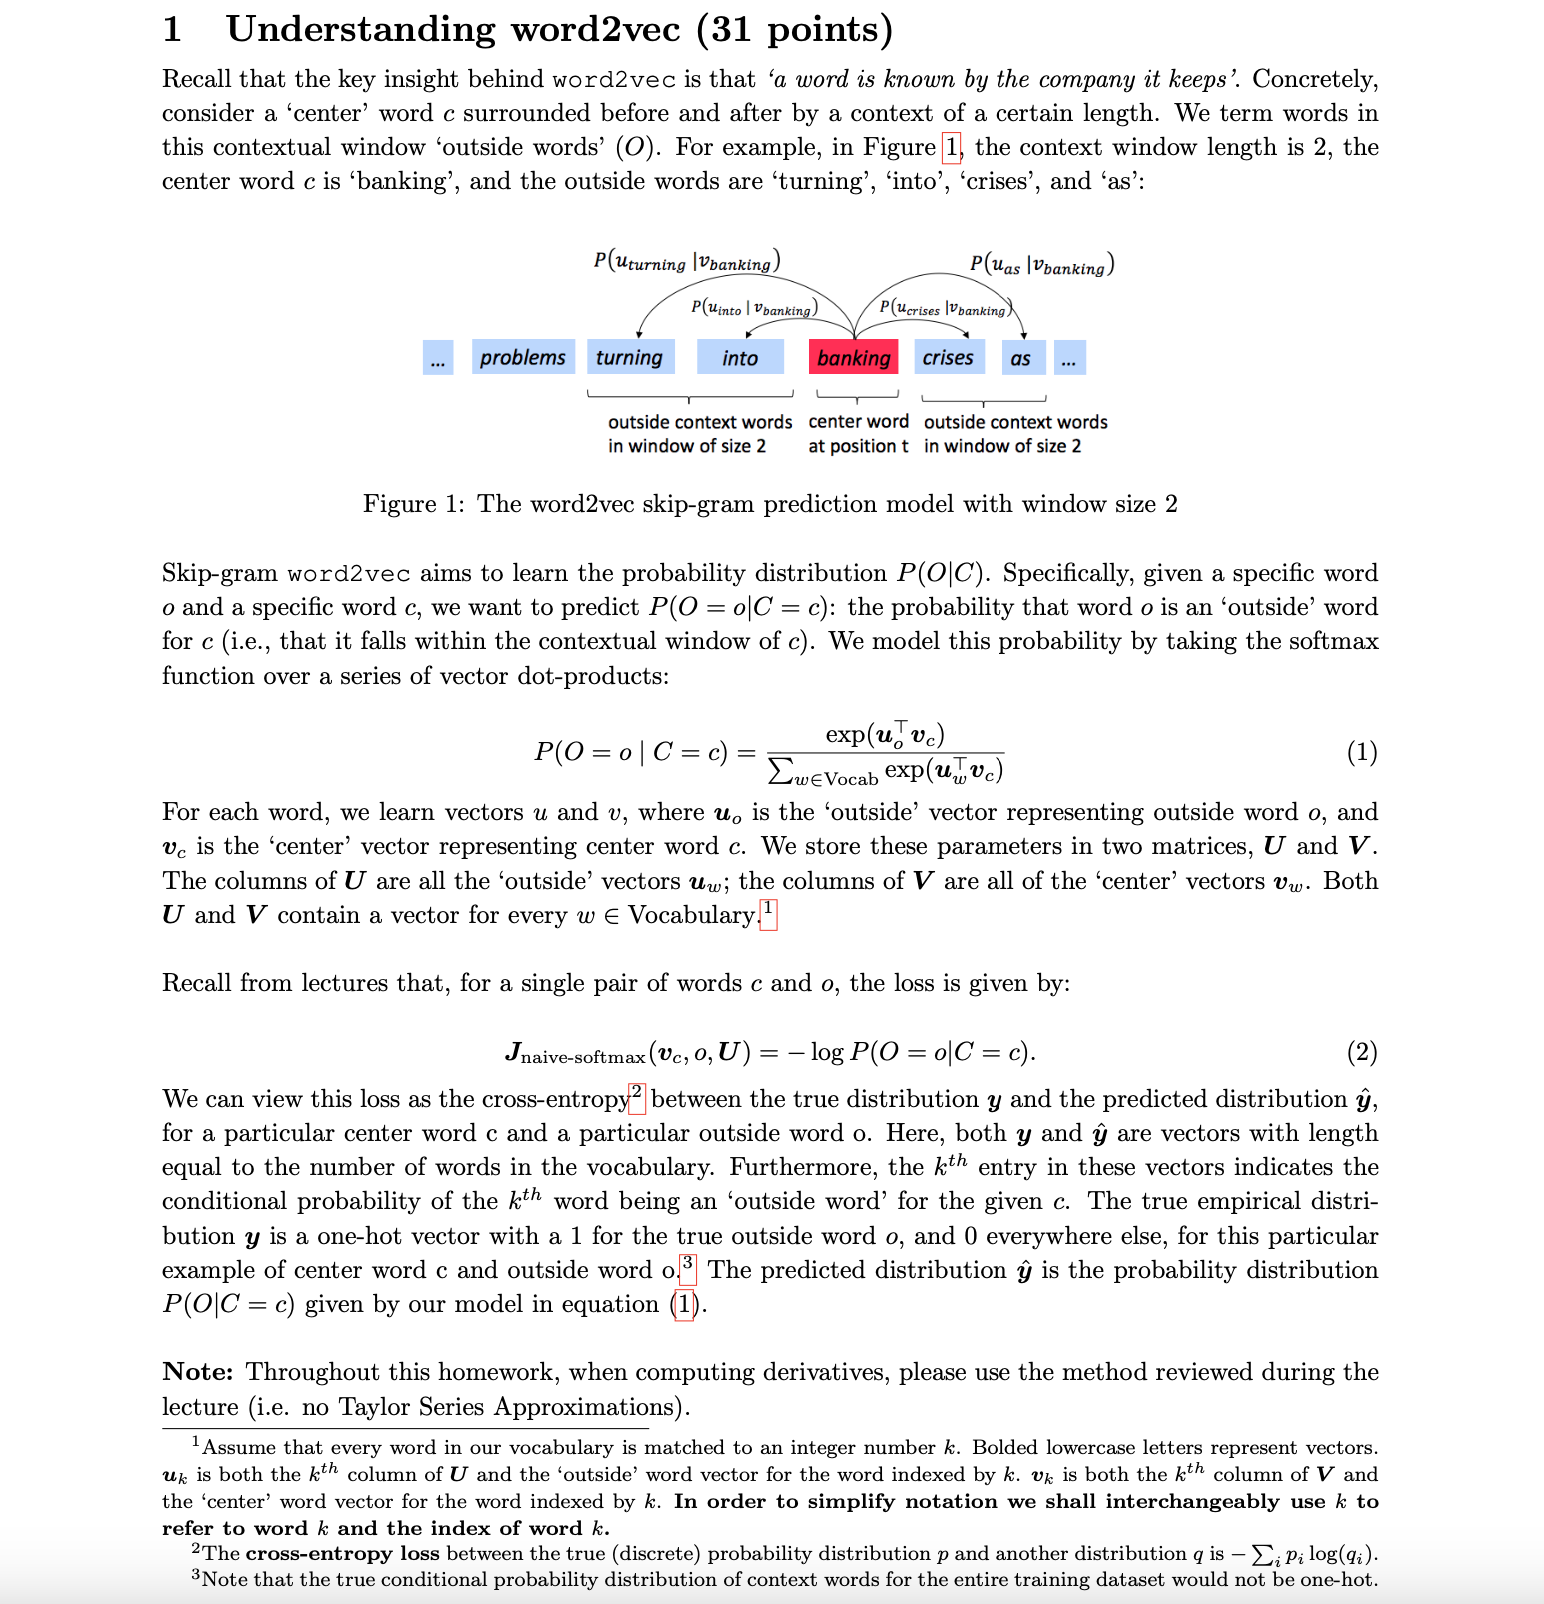

# Part 1 Questions

## (a)
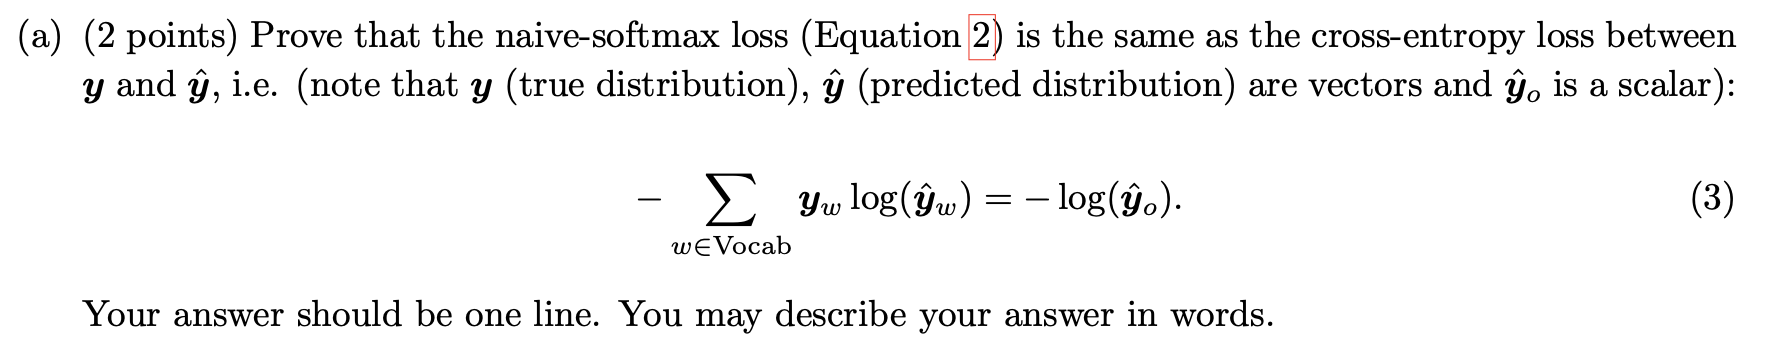

Eqn (2) is $J = -\log P(o|c)$, while cross-entropy is $-\sum_i p_i \log (q_i)$. Since $p_i$ is one-hot, taking the sum over $i$ is equal to taking just $-\log(q_i)$ at the observed value of $i$, which is exactly the expression from eq (2) taking $q_i = P(o|c)$.

## (b)
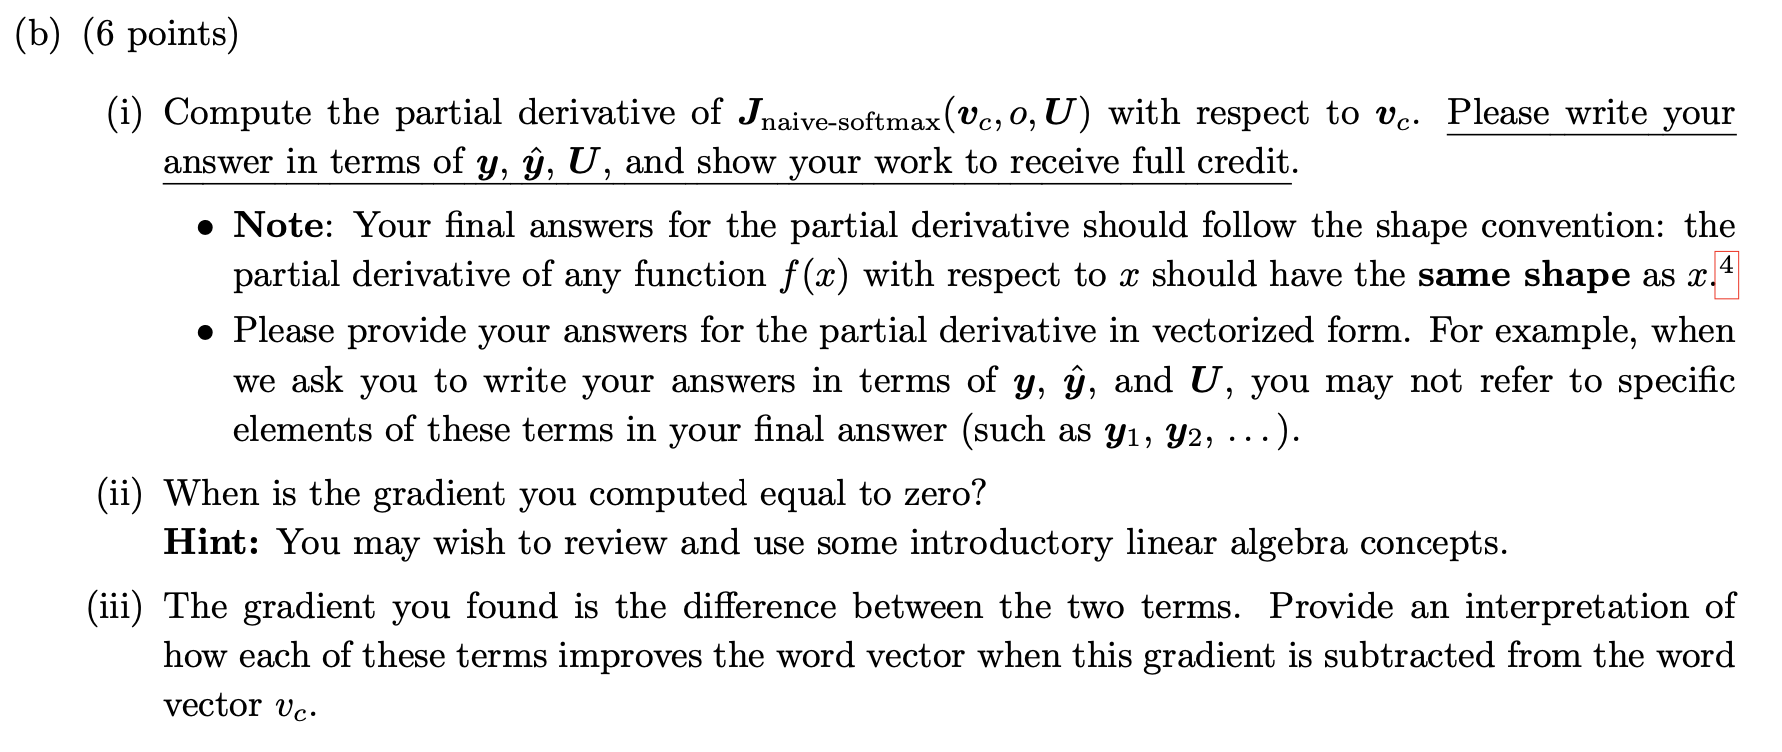

(i) This was derived in the lecture notes, but not in this format.

$\frac{\partial}{\partial \mathbf{v}_c}-\log(p(o|c)) = -U_o + \sum_x p(x|c) U_x$,

where subscripts indicate "index the $U$ matrix at the index of the center ($c$) or outside ($o$) word.

(ii) This is equal to zero when 

$U_o = \sum_x p(x|c) U_x$,

or when 

$1 = \sum_x p(x|c) \frac{U_o^T U_x}{||U_o||_x^2}$.

So basically it's the sum of the cosine similarity times the probability summed over every vector. I feel like there's something more subtle here that I'm missing.

(iii) We update with gradient descent, so $v_{c}^{i+1} = v_{c}^{i} - \alpha \frac{\partial J}{\partial v_c^i}$

The first term is simple -- it just adds the current observed word vector to $v_c$, increasing the probability of the center word happening when this observed word is in the context.

The second word pushes the gradient away from words that aren't observed that have a high probability of occurring. So if the model things word X should occur a lot, but it keeps not seeing it, then $v_c$ will point less in the direction of $U_X$ each iteration.

## (c) 
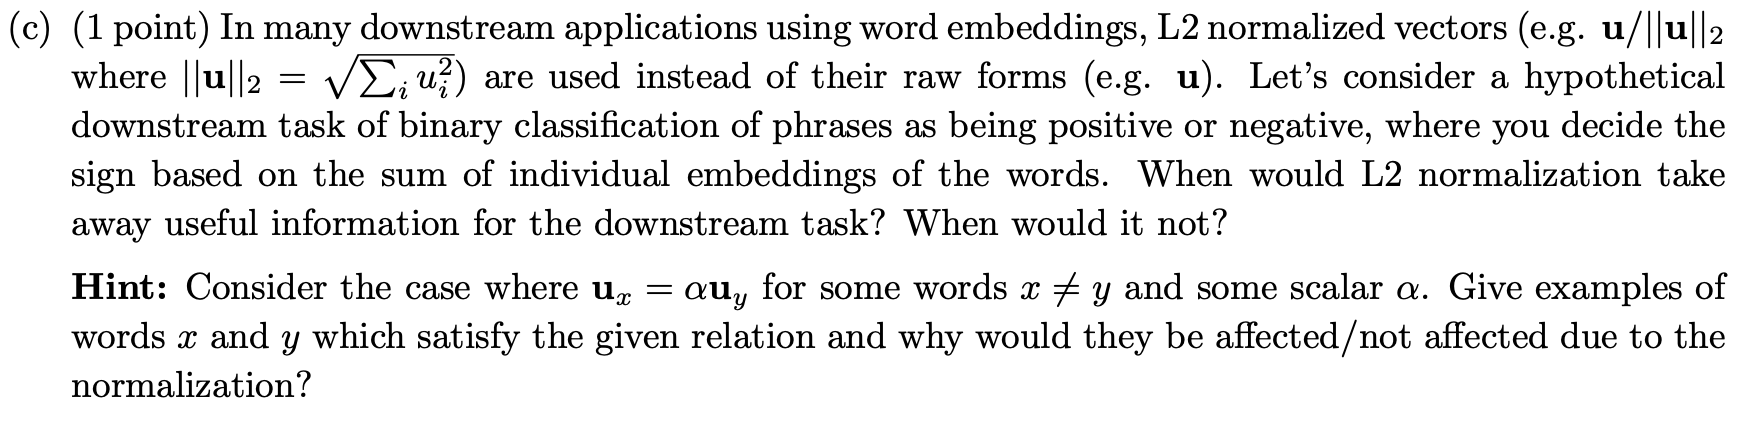

Two words that basically mean the same thing but with different severities would be negatively affected. For example, "dislike" and "hate" probably point in a similar direction (e.g., have the same normalized unit vector), but "hate" is a much stronger sentiment. The choice of normalizing these words would lose some information.

For words that are orthogonal, or that point away from the sentiment direction, this normalization shouldn't matter.

## (d) 
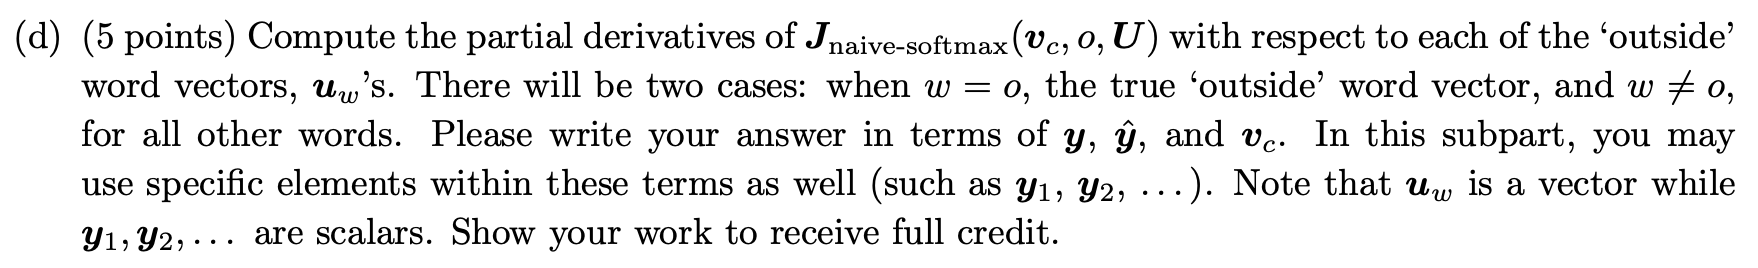

$\frac{\partial J_{\rm naive-softmax}}{\partial u_o} = 0$, as shown here:

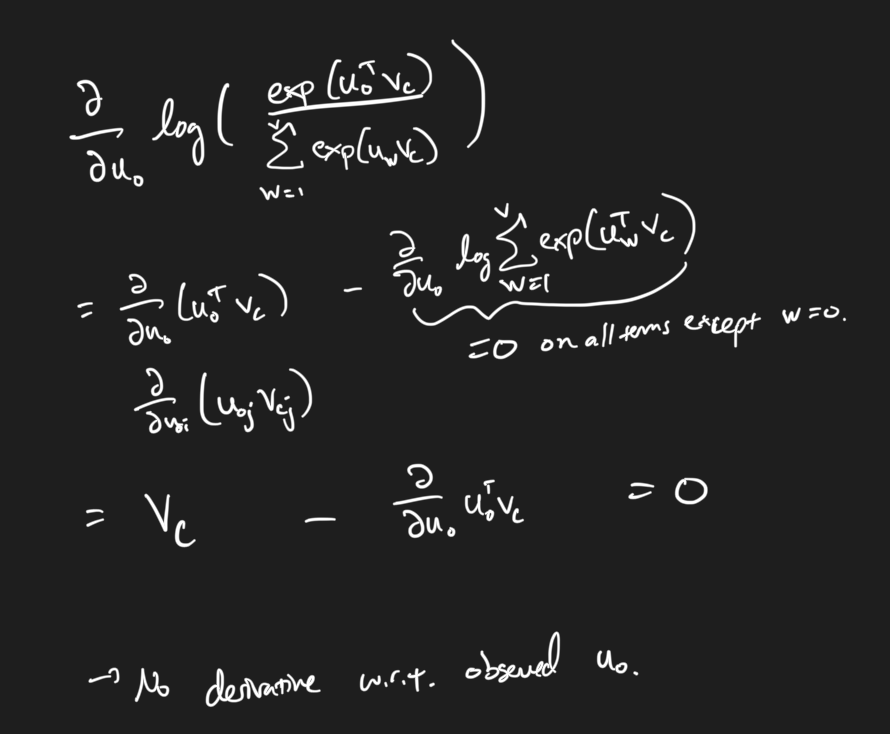

$\frac{\partial J_{\rm naive-softmax}}{\partial u_w} = -v_c$, as shown here:

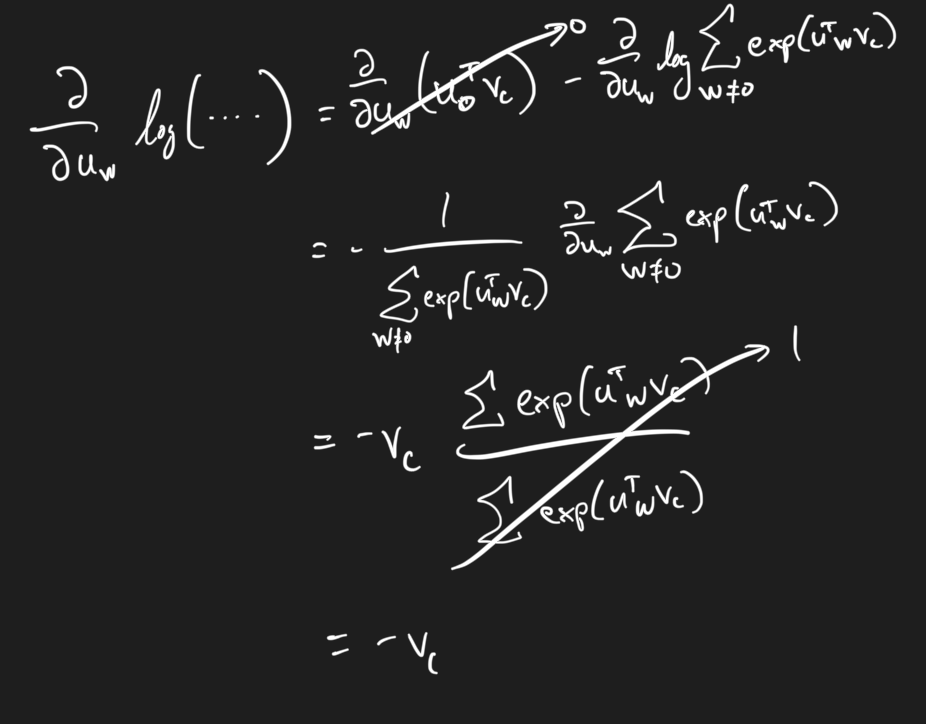

## (e)

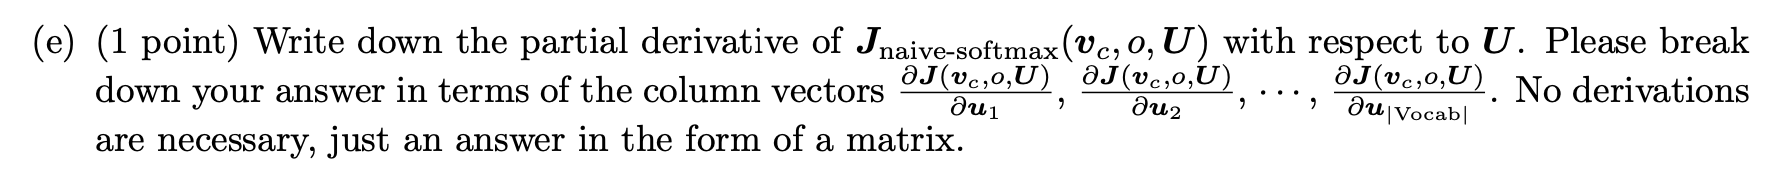

$\frac{\partial J}{\partial u_i} = - \left[v_c, v_c, \cdots, v_c, 0, v_c, \cdots v_c\right]$

(f)
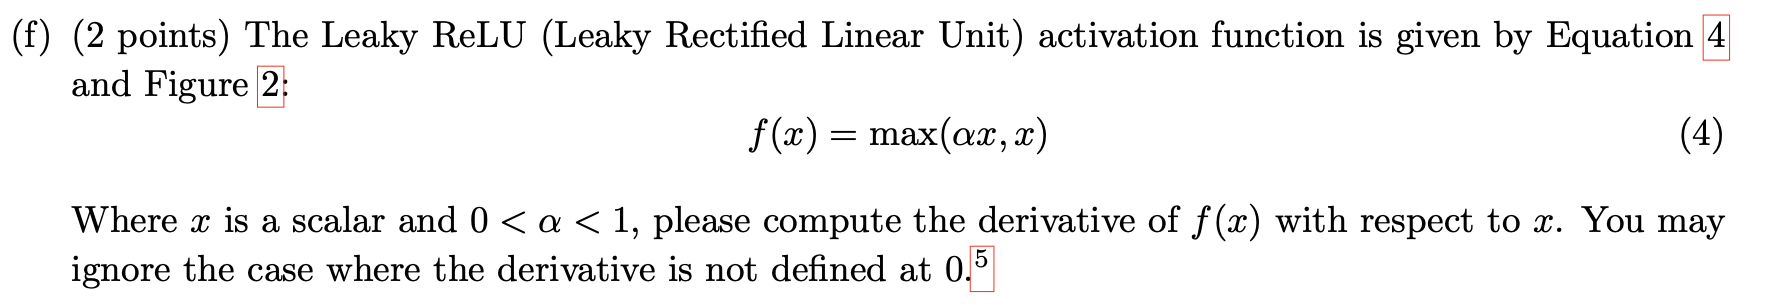
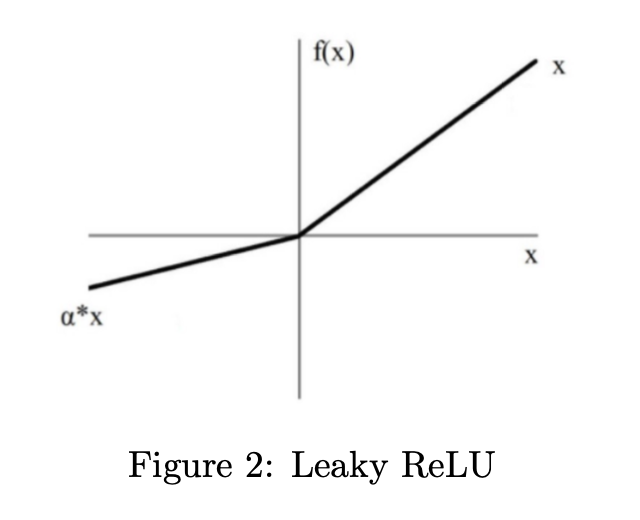

$f(x) = \begin{cases}\alpha x & x < 0 \\ x & x \geq 0\end{cases}$

so $\partial f / \partial x = \begin{cases}\alpha & x < 0 \\ 1 & x \geq 0\end{cases}$

(g)
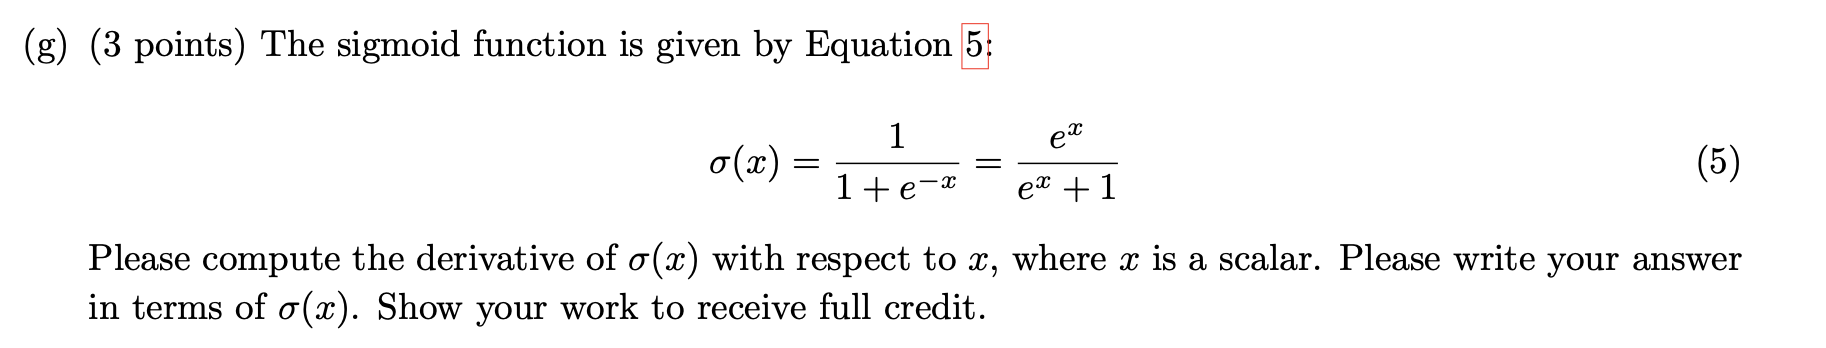

$\frac{\partial}{\partial x} \frac{e^{x}}{e^{x} + 1} = \frac{1}{e^{x} + 1}\frac{\partial}{\partial x} e^x + e^x \frac{\partial}{\partial x} \frac{1}{e^{x} + 1} = \sigma(x) + e^x - \frac{1}{(1 + e^x)^2} e^x = \sigma(x) - \sigma(x)^2$

(h)
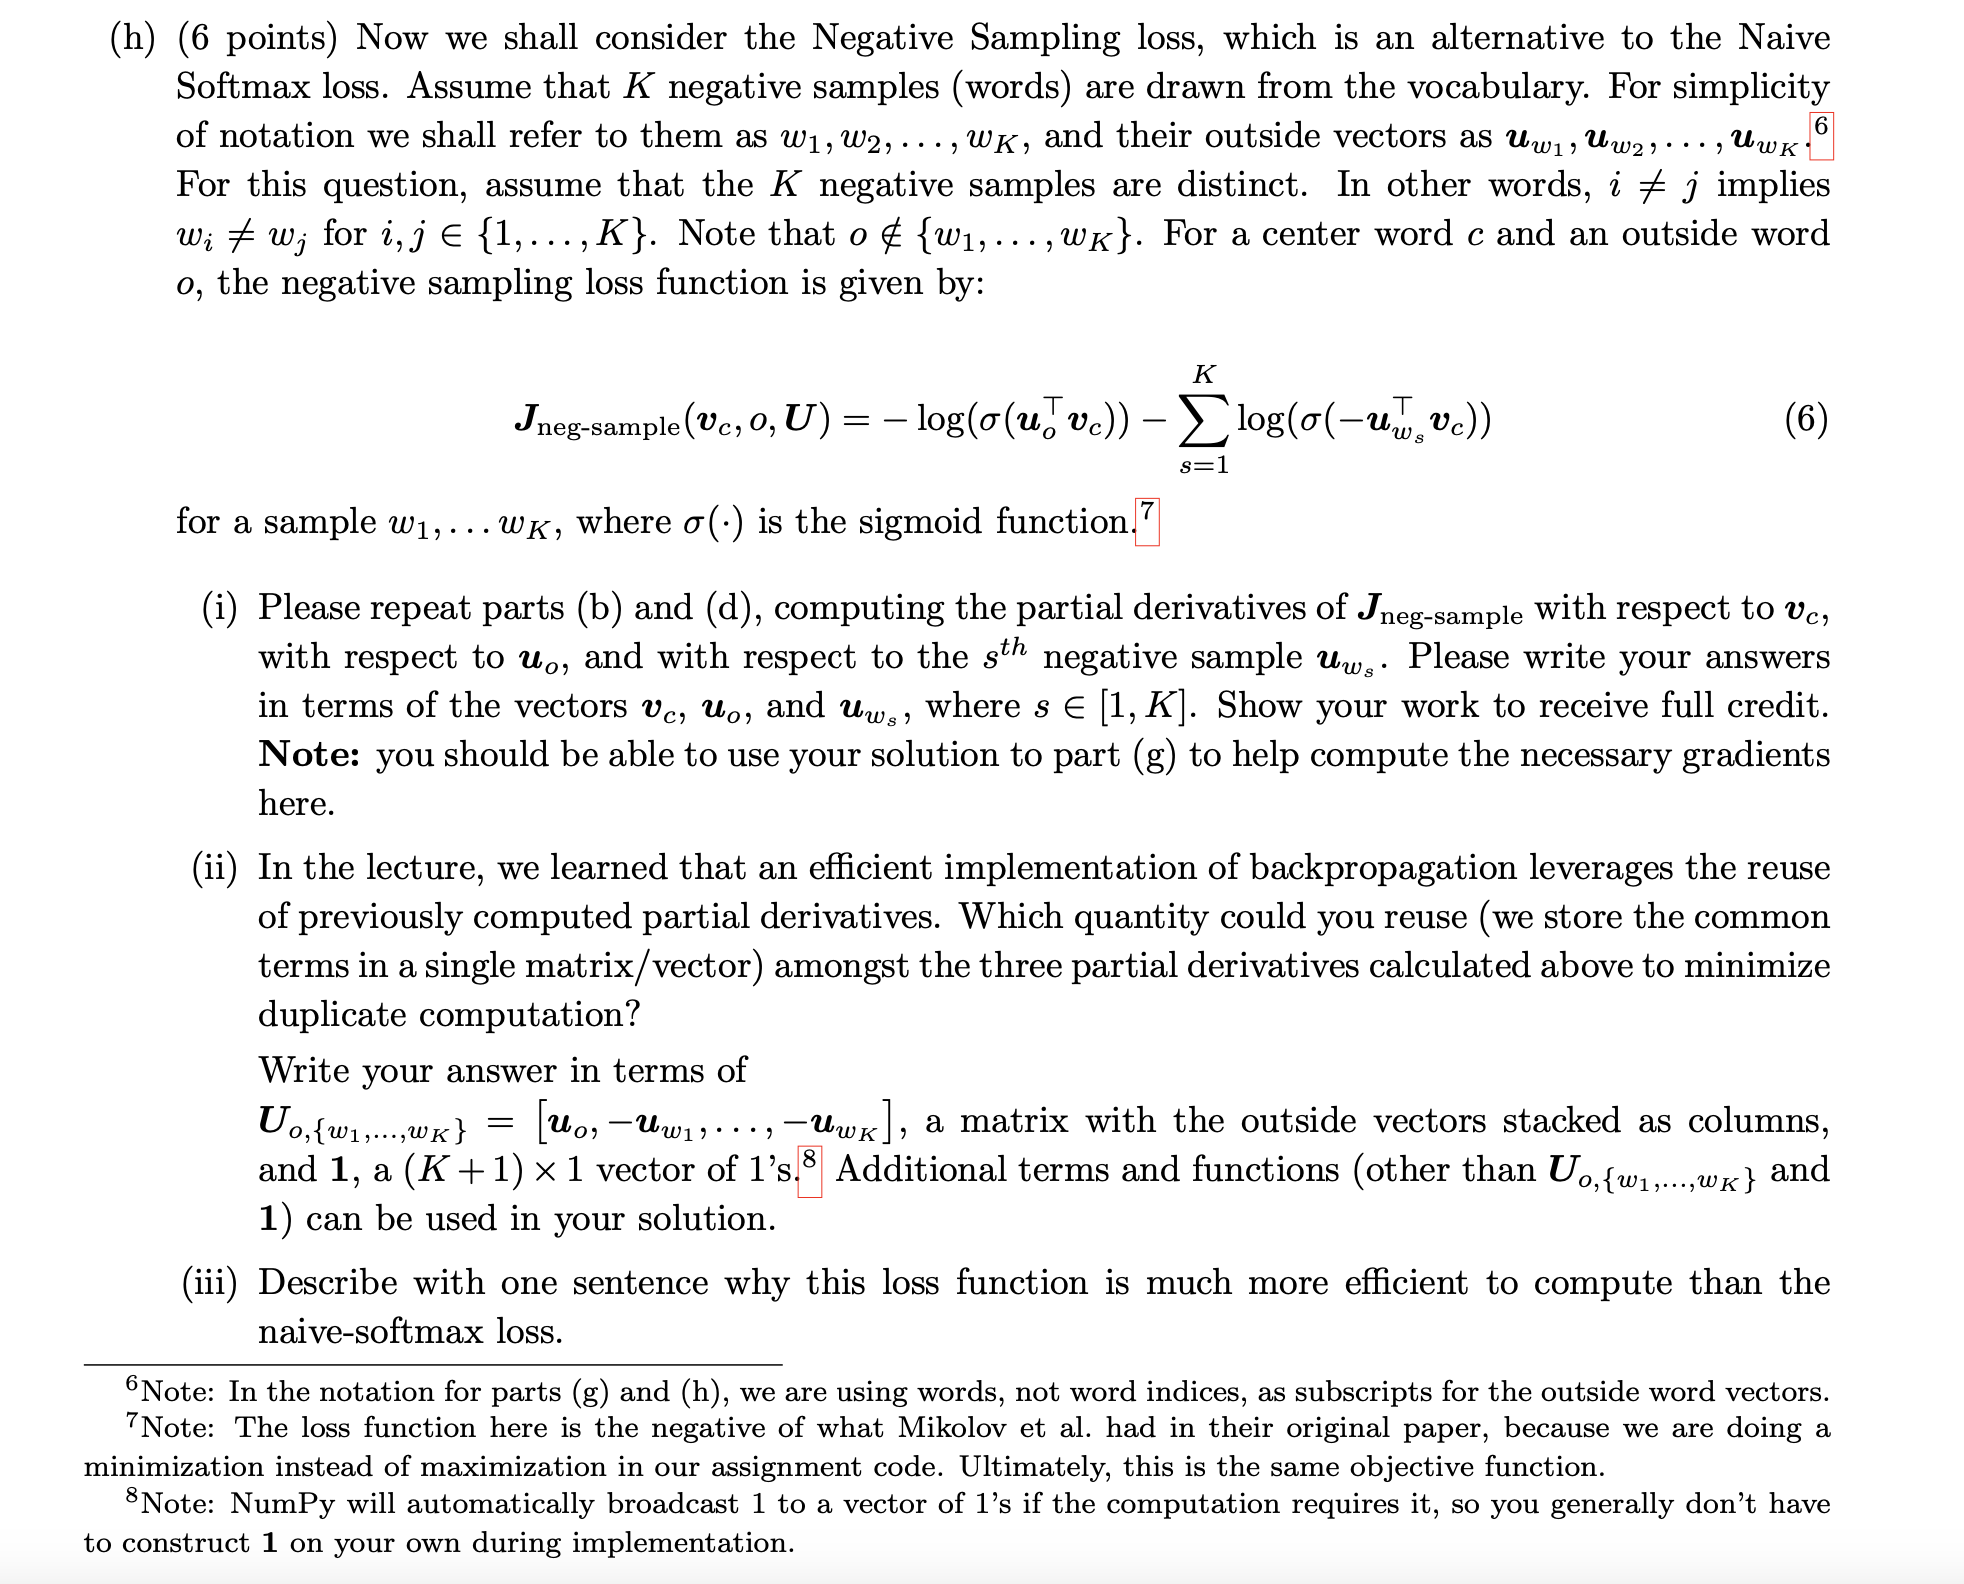
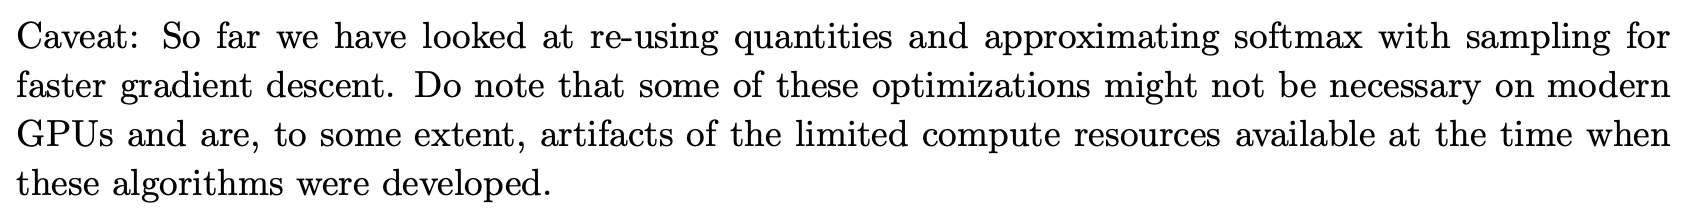